<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z08_D_classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [26]:
np.random.seed(42)

In [27]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
# X[1]
X = X / 255.

In [29]:
print(y) 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


array([5, 0, 4, ..., 4, 5, 6])

In [30]:
X=X.values
X.shape, y.shape

((70000, 784), (70000,))

In [31]:
type(X)

numpy.ndarray

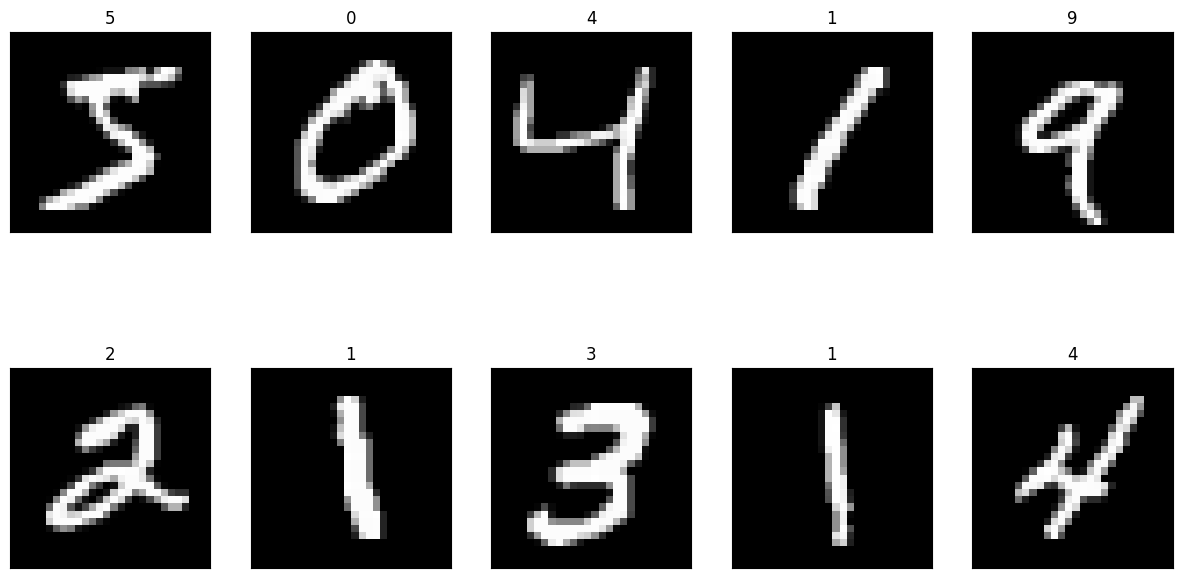

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

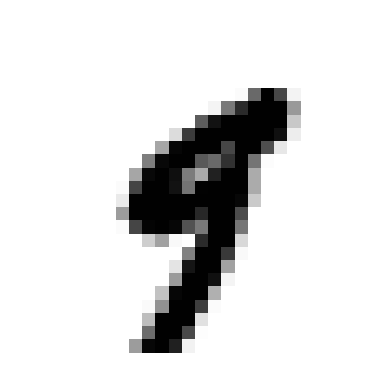

In [33]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [34]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    import matplotlib
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

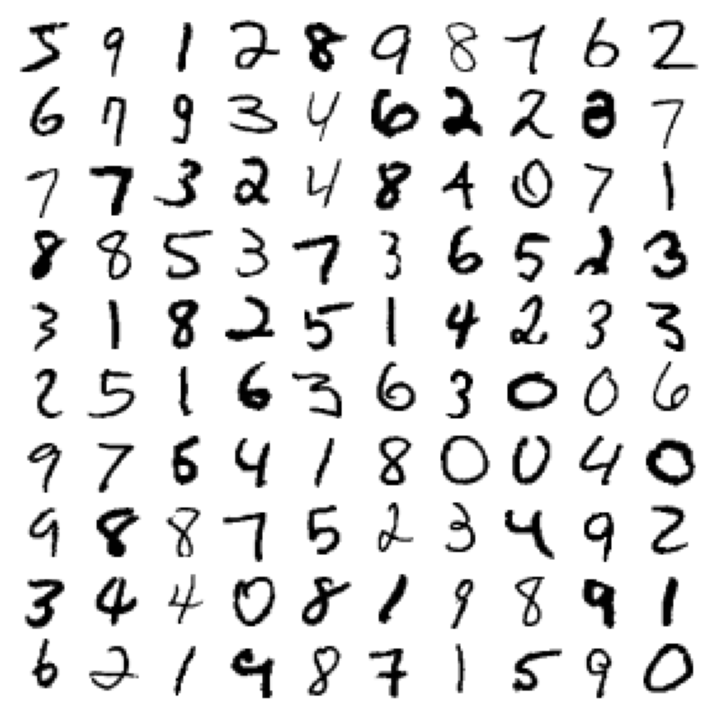

In [35]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

P0każmy przykładem binarnego klasyfikatora, zdolnego rozróżnić tylko dwie klasy:
 * 5 
  nie-5. 
  
Stwórzmy docelowe zboty (trin/test) dla tego zadania klasyfikacji:

In [36]:
# X_train = mnist.train.images 
# y_train = mnist.train.labels
# X_test = mnist.test.images
# y_test = mnist.test.labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [40]:
print(X_train.shape)
print(y_train_5.shape)
print(np.unique(y_train_5))

(56000, 784)
(56000,)
[False  True]


# Zad. 

Stwórzmy **LogisticRegression** i naucz go na całym zbiorze treningowym.


In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Teraz możesz go użyć aby wykryć czy dana liczba to  5:

In [42]:
clf.predict([some_digit])

array([False])

Klasyfikator poprawnie wskazał, że ten obraz reprezentuje 5 (prawda). 
Wygląda na to, że odgadł w tym konkretnym przypadku! 

## Teraz oceńmy wydajność tego modelu.

Wykorzystajmy funkcję 
```python
cross_val_score() 
```
do oceny naszego modelu **LogisticRegression** przy użyciu **K-fold crossvalidation**, z trzema fałdami. 

Pamiętaj, że **K-fold crossvalidation** oznacza podział zestawu treningowego na **K** części (w tym przypadku trzy), a następnie prognozowanie i ocenianie ich na każdym z kawałków przy użyciu modelu nauczonego na pozostałych danych (dwa pozostałe kawąłki).

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.97583972, 0.9736969 , 0.97294546])

**Łał! Powyżej 97% dokładności (stosunek prawidłowych przewidywań) na wszystkich zbiorach walidacyjnych!**

**To wygląda niesamowicie, prawda? **

Zanim wpadniemy w samozachwyt :), spójrzmy na bardzo głupi klasyfikator, który klasyfikuje każdy pojedynczy obraz do klasy "nie-5":

In [45]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return 

# Zad.

Zgadnij jakie **accuracy** dostaniemy.

In [46]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 187, in wrapper
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a 

array([nan, nan, nan])

**Otrzymaliśmy ponad 90% dokładność! **

Wynika to z faktu, że tylko około 10% obrazów to 5., więc jeśli zawsze zgadniesz, że obraz to nie 5, będziesz mieć rację w około 90% przypadków. 

To pokazuje dlaczego **accuracy** nie jest na ogół preferowaną miarą wydajności klasyfikatorów, szczególnie gdy mamy do czynienia z niezbalansowanymi danymi (to znaczy, gdy niektóre klasy są znacznie częstsze niż inne).

# Confusion Matrix

 * Aby obliczyć **Confusion Matrix**, najpierw trzeba mieć zestaw prognoz, aby można je było porównać z rzeczywistymi etykietami.

 * Możesz przewidywać na zestawie testowym (test set), ale na razie trzymaj go nietknięty (pamiętaj, że chcesz użyć zestawu testowego tylko na samym końcu projektu, gdy masz klasyfikator, który jesteś gotowy do uruchomienia). 
 * Zamiast tego możesz użyć funkcji 
 ```pyrthon
 cross_val_predict()
 ```
 
 * Podobnie jak funkcja **cross_val_score()** funkcja **cross_val_predict()** wykonuje **K-fold cross-validation**, ale zamiast zwracać wyniki oceny, zwraca predykcje wykonane dla każdego testu. 

 * Oznacza to, że uzyskujesz czystą prognozę dla każdej instancji w zbiorze treningowym ("czysta" oznacza, że przewidywanie jest dokonywane przez model, który nigdy nie widział danych podczas treningu). 

In [47]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train_5, cv=3)
y_train_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([ True, False, False, ..., False, False, False])

# Confusion matrix
Do **confusion_matrix()** wystarczy przekazać etykiety docelowe (y_train_5) i przewidywane klasy (y_train_pred):

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[50506,   454],
       [  993,  4047]])

* Każdy rząd **confusion_matrix** reprezentuje rzeczywistą klasę, podczas gdy każda kolumna reprezentuje przewidywaną klasę.
* Pierwszy rząd tej macierzy uwzględnia obrazy inne niż 5 (klasa negatywna): 
  * 53 272 z nich zostało poprawnie sklasyfikowanych jako non-5 (**true negatives**), 
  *  1 307 zostało błędnie sklasyfikowane jako 5s (**false positives**). 
* Drugi rząd uwzględnia obrazy 5s (klasa pozytywna): 
  * 1 077 zostały błędnie sklasyfikowane jako nie-5 (**false negatives**), 
  * 4 344 zostały poprawnie sklasyfikowane jako 5s (**true positives**). 

Idealny klasyfikator miałby tylko **true positives** i **true negatives**, więc jego **confusion_matrix** miałaby niezerowe wartości tylko na swojej głównej przekątnej (od lewej górnej do prawej dolnej):

In [49]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[50960,     0],
       [    0,  5040]])

**Confusion matrix** dostarcza wielu informacji, ale bardziej przydatne sa miary numeryczne. 

 * **precision** to dokładność pozytywnych przewidywań -- precyzja klasyfikatora:

$$
precision = \frac{TP}{TP + FP}
$$
 
 * Prostym sposobem na uzyskanie doskonałej precyzji jest wykonanie jednej pozytywnej prognozy i zapewnienie jej poprawności (precision = 1/1 = 100%). 
 * Nie byłoby to zbyt użyteczne, ponieważ klasyfikator zignorowałby wszystkie oprócz jednego pozytywnego wystąpienia. 
 * Precyzję zwykle stosuje się wraz z inną miarą o nazwie **recall**, zwaną również czułością **sensitivity**.
 * **recall** jest to stosunek pozytywnych instancji, które są poprawnie wykrywane przez klasyfikator 
 
$$
recall = \frac{TP}{TP + FN}
$$

In [50]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred)) 

0.8991335258831371
0.8029761904761905


### Teraz widzimy, że detektor piątek nie wygląda tak dobrze. 

* Kiedy twierdzi, że obraz reprezentuje 5, jest to poprawne tylko w 79% przypadków. 
* Co więcej, wykrywa tylko 81% z 5s.

# F1 score


 * Często wygodnie jest łączyć **precision** i **recall** w pojedynczą metrykę zwaną **F1 score** w szczególności jeśli potrzebujesz prostego sposobu na porównanie dwóch klasyfikatorów. 

 * Wynik **F1  score** jest średnią harmoniczną  **precision** i **recall**. 
 
$$
F_1 = \frac{2}{ \frac{1}{precision} + \frac{1}{recall} } = 2\frac{precision * recall}{precision + recall}
= \frac{TP}{TP + \frac{FN+FP}{2}}
$$

 * Podczas gdy klasyczna środek traktuje wszystkie wartości w równym stopniu **średnia harmoniczna** nadaje znacznie większą wagę mniejszym wartością. 

 * W rezultacie klasyfikator uzyska wysoki wynik **F1 score** jeśli zarówno  **precision** i **recall** będą wysokie.

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8483387485588514

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))#, target_names=["not 5", "5"]))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99     50960
        True       0.90      0.80      0.85      5040

    accuracy                           0.97     56000
   macro avg       0.94      0.90      0.92     56000
weighted avg       0.97      0.97      0.97     56000



# Zad.

Wykonaj powyższą procedurę dziląc zbiór danych na train/test.

Wyznacz:

* precision
* recall
* f1-score


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
y_test_5

array([False, False, False, ..., False, False, False])

In [56]:
predected = clf.predict(X_test)
f1_score(predected,y_test_5,average=None)

array([0.19080117, 0.00207684, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [57]:
print(precision_score(y_test,predected, average=None))
print(recall_score(y_test,predected, average= None))

[0.96100074 0.94614903 0.91288433 0.91147309 0.93628186 0.87136294
 0.94671533 0.9332893  0.8890566  0.89837685]
[0.96029412 0.97546804 0.90166305 0.87969925 0.93558052 0.88080495
 0.94809942 0.93949468 0.87976102 0.9047619 ]
